# Modeling 

In [110]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense


from imblearn.over_sampling import SMOTE

pd.options.display.max_columns = None
pd.options.display.max_rows = None 

import warnings
warnings.filterwarnings('ignore') # For UndefinedMetricWarning that comes up for modeling that is not able to predict 

2023-05-18 21:56:05.119402: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
ace = pd.read_csv('../Datasets/clean_ace.csv') 

In [3]:
ace.head(3)

,DIABETE4,BPHIGH6,ACEDEPRS,ACEDRINK,ACEDRUGS,ACEPRISN,ACEDIVRC,ACEPUNCH,ACEHURT1,ACESWEAR,ACETOUCH,ACETTHEM,ACEHVSEX,ACEADSAF,ACEADNED
0,0.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
1,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0
2,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0


Checking to make sure there are actually diabetes and high blood pressure values since diabetes models are struggling to predict 

In [45]:
diabetes_cases = ace[ace['DIABETE4'] == 1]
print(len(diabetes_cases))

8672


In [47]:
high_bp_cases = ace[ace['BPHIGH6'] == 1]
print(len(high_bp_cases))

23518


### Baseline

In [4]:
# Data Preprocessing
X = ace.drop(['DIABETE4', 'BPHIGH6'], axis=1)  # Input features
y_diabetes = ace['DIABETE4']  # Target variable for diabetes prediction

# Split the data into training and test sets for diabetes prediction
X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(X, y_diabetes, test_size=0.2, random_state=42)

# Create a baseline classifier for diabetes
baseline_classifier_diabetes = DummyClassifier(strategy='most_frequent')

# Fit the baseline classifier on the training data for diabetes
baseline_classifier_diabetes.fit(X_train_diabetes, y_train_diabetes)

# Predict the majority class labels for the test data for diabetes
y_pred_baseline_diabetes = baseline_classifier_diabetes.predict(X_test_diabetes)

# Calculate baseline scores for diabetes
accuracy_diabetes = metrics.accuracy_score(y_test_diabetes, y_pred_baseline_diabetes)
precision_diabetes = metrics.precision_score(y_test_diabetes, y_pred_baseline_diabetes)
recall_diabetes = metrics.recall_score(y_test_diabetes, y_pred_baseline_diabetes)
f1_diabetes = metrics.f1_score(y_test_diabetes, y_pred_baseline_diabetes)

print('Baseline Scores for Diabetes:')
print(f'Accuracy: {accuracy_diabetes}')
print(f'Precision: {precision_diabetes}')
print(f'Recall: {recall_diabetes}')
print(f'F1-Score: {f1_diabetes}')

Baseline Scores for Diabetes:
Accuracy: 0.8351816443594646
Precision: 0.0
Recall: 0.0
F1-Score: 0.0


/Users/danner/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


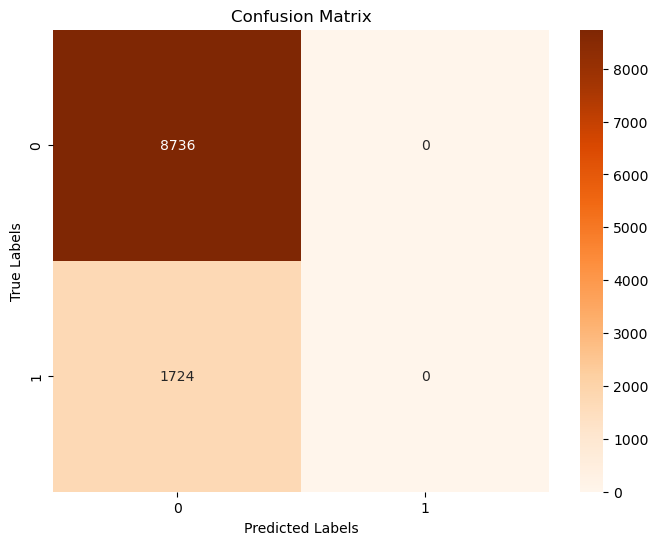

In [5]:
cm = confusion_matrix(y_test_diabetes, y_pred_baseline_diabetes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels');

In [61]:
# Data Preprocessing
X = ace.drop(['DIABETE4', 'BPHIGH6'], axis=1)  # Input features
y_diabetes = ace['DIABETE4']  # Target variable for diabetes prediction

# Split the data into training and test sets for diabetes prediction
X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(X, y_diabetes, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training data for diabetes prediction
smote = SMOTE(random_state=42)
X_train_balanced_diabetes, y_train_balanced_diabetes = smote.fit_resample(X_train_diabetes, y_train_diabetes)

# Create a baseline classifier for diabetes
baseline_classifier_diabetes = DummyClassifier(strategy='most_frequent')

# Fit the baseline classifier on the balanced training data for diabetes
baseline_classifier_diabetes.fit(X_train_balanced_diabetes, y_train_balanced_diabetes)

# Predict the majority class labels for the test data for diabetes
y_pred_baseline_diabetes = baseline_classifier_diabetes.predict(X_test_diabetes)

# Calculate baseline scores for diabetes
accuracy_diabetes = metrics.accuracy_score(y_test_diabetes, y_pred_baseline_diabetes)
precision_diabetes = metrics.precision_score(y_test_diabetes, y_pred_baseline_diabetes)
recall_diabetes = metrics.recall_score(y_test_diabetes, y_pred_baseline_diabetes)
f1_diabetes = metrics.f1_score(y_test_diabetes, y_pred_baseline_diabetes)

print('Baseline Scores for Diabetes:')
print(f'Accuracy: {accuracy_diabetes}')
print(f'Precision: {precision_diabetes}')
print(f'Recall: {recall_diabetes}')
print(f'F1-Score: {f1_diabetes}')

Baseline Scores for Diabetes:
Accuracy: 0.8351816443594646
Precision: 0.0
Recall: 0.0
F1-Score: 0.0


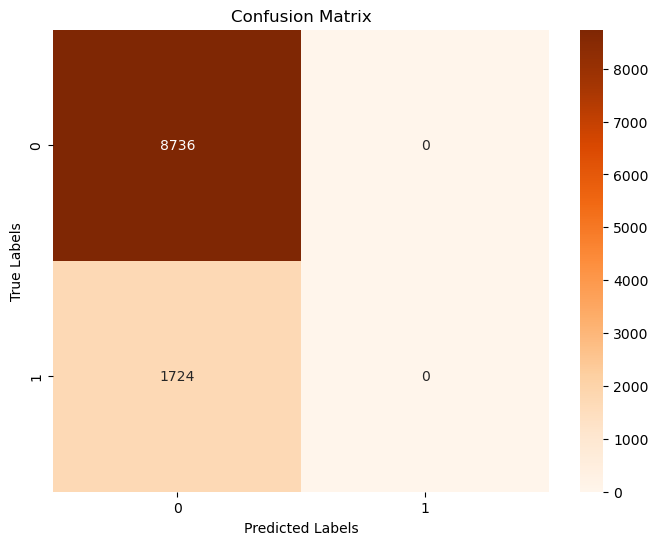

In [63]:
cm = confusion_matrix(y_test_diabetes, y_pred_baseline_diabetes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels'); 

In [6]:
# Data Preprocessing
X = ace.drop(['DIABETE4', 'BPHIGH6'], axis=1)  # Input features
y_high_blood_pressure = ace['BPHIGH6']  # Target variable for high blood pressure prediction

# Split the data into training and test sets for high blood pressure prediction
X_train_bp, X_test_bp, y_train_bp, y_test_bp = train_test_split(X, y_high_blood_pressure, test_size=0.2, random_state=42)

# Create a baseline classifier for high blood pressure
baseline_classifier_bp = DummyClassifier(strategy='most_frequent')

# Fit the baseline classifier on the training data for high blood pressure
baseline_classifier_bp.fit(X_train_bp, y_train_bp)

# Predict the majority class labels for the test data for high blood pressure
y_pred_baseline_bp = baseline_classifier_bp.predict(X_test_bp)

# Calculate baseline scores for high blood pressure
accuracy_bp = metrics.accuracy_score(y_test_bp, y_pred_baseline_bp)
precision_bp = metrics.precision_score(y_test_bp, y_pred_baseline_bp)
recall_bp = metrics.recall_score(y_test_bp, y_pred_baseline_bp)
f1_bp = metrics.f1_score(y_test_bp, y_pred_baseline_bp)

print('Baseline Scores for High Blood Pressure:')
print(f'Accuracy: {accuracy_bp}')
print(f'Precision: {precision_bp}')
print(f'Recall: {recall_bp}')
print(f'F1-Score: {f1_bp}')

Baseline Scores for High Blood Pressure:
Accuracy: 0.5485659655831739
Precision: 0.0
Recall: 0.0
F1-Score: 0.0


/Users/danner/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


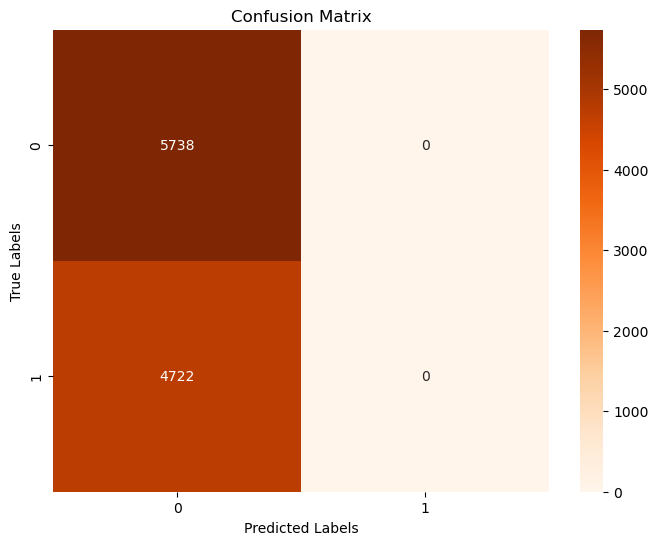

In [7]:
cm = confusion_matrix(y_test_bp, y_pred_baseline_bp)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels');

In [64]:
# Apply SMOTE to balance the training data for high blood pressure prediction
smote = SMOTE(random_state=42)
X_train_balanced_bp, y_train_balanced_bp = smote.fit_resample(X_train_bp, y_train_bp)

# Create a baseline classifier for high blood pressure
baseline_classifier_bp = DummyClassifier(strategy='most_frequent')

# Fit the baseline classifier on the balanced training data for high blood pressure
baseline_classifier_bp.fit(X_train_balanced_bp, y_train_balanced_bp)

# Predict the majority class labels for the test data for high blood pressure
y_pred_baseline_bp = baseline_classifier_bp.predict(X_test_bp)

# Calculate baseline scores for high blood pressure
accuracy_bp = metrics.accuracy_score(y_test_bp, y_pred_baseline_bp)
precision_bp = metrics.precision_score(y_test_bp, y_pred_baseline_bp)
recall_bp = metrics.recall_score(y_test_bp, y_pred_baseline_bp)
f1_bp = metrics.f1_score(y_test_bp, y_pred_baseline_bp)

print('Baseline Scores for High Blood Pressure:')
print(f'Accuracy: {accuracy_bp}')
print(f'Precision: {precision_bp}')
print(f'Recall: {recall_bp}')
print(f'F1-Score: {f1_bp}')

Baseline Scores for High Blood Pressure:
Accuracy: 0.5485659655831739
Precision: 0.0
Recall: 0.0
F1-Score: 0.0


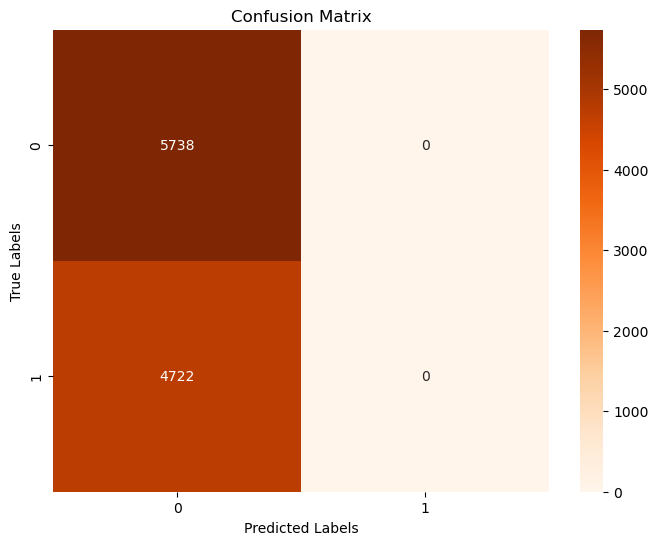

In [65]:
cm = confusion_matrix(y_test_bp, y_pred_baseline_bp)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels');

The baseline model (including when using SMOTE) is unable to predict values with diabetes or high blood pressure. 

## Logistic Regression 

### Diabetes

In [8]:
# Step 1: Data Preprocessing
X = ace.drop(['DIABETE4', 'BPHIGH6'], axis=1)  # Input features
y_diabetes = ace['DIABETE4']  # Target variable for diabetes prediction

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_diabetes, test_size=0.2, random_state=42)

# Step 3: Model Selection (Logistic Regression)
model = LogisticRegression()

# Step 4: Model Training
model.fit(X_train, y_train)

# Step 5: Model Evaluation
y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

Accuracy: 0.8351816443594646
Precision: 0.0
Recall: 0.0
F1-Score: 0.0


/Users/danner/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


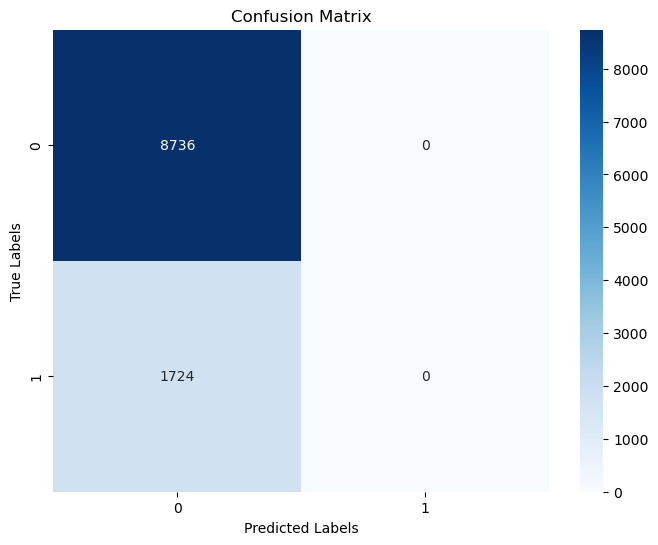

In [9]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred)  

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels');

#### Hyperparameters 

##### Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'max_iter': [100, 200, 300],
    'class_weight': [None, 'balanced'],
}


##### Create the model
model = LogisticRegression()

##### Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

##### Step 6: Print the best hyperparameters
best_params = grid_search.best_params_
print('Best Hyperparameters:')
print(best_params)

##### Get the best model with the best hyperparameters
best_model = grid_search.best_estimator_

##### Model Evaluation
y_pred = best_model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

print('Evaluation Metrics:')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')


Best Hyperparameters:

{'C': 0.1, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}

Evaluation Metrics:

Accuracy: 0.5652007648183557

Precision: 0.5657168102496134

Recall: 0.892645521087487

F1-Score: 0.6925365062195782

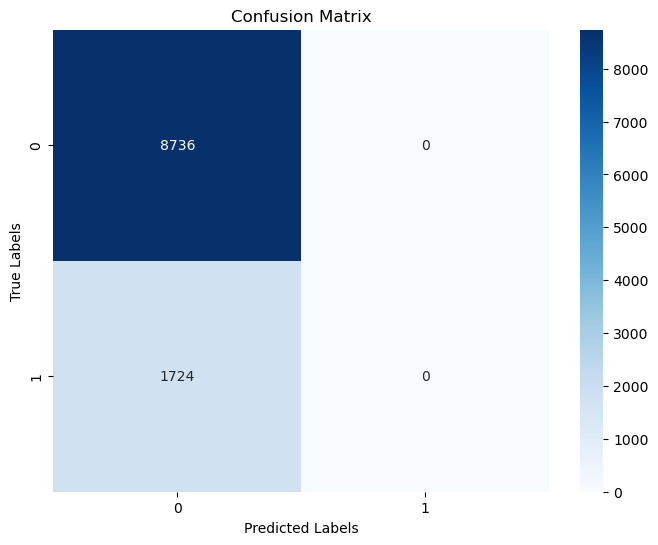

In [10]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred)  

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels');

In [14]:
##### Define the parameter grid
param_grid = {
    'C': [0.09, 0.1, 0.11],
    'penalty': ['l2'],
    'solver': ['liblinear', 'newton-cg', 'saga'],
    'max_iter': [25, 50, 75, 100],
    'class_weight': [None],
}


##### Create the model
model = LogisticRegression()

##### Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

##### Step 6: Print the best hyperparameters
best_params = grid_search.best_params_
print('Best Hyperparameters:')
print(best_params)

##### Get the best model with the best hyperparameters
best_model = grid_search.best_estimator_

##### Model Evaluation
y_pred = best_model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

print('Evaluation Metrics:')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

Best Hyperparameters:
{'C': 0.09, 'class_weight': None, 'max_iter': 25, 'penalty': 'l2', 'solver': 'liblinear'}
Evaluation Metrics:
Accuracy: 0.8351816443594646
Precision: 0.0
Recall: 0.0
F1-Score: 0.0


/Users/danner/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best Hyperparameters:

{'C': 0.09, 'class_weight': None, 'max_iter': 25, 'penalty': 'l2', 'solver': 'liblinear'}

Evaluation Metrics:

Accuracy: 0.8351816443594646

Precision: 0.0

Recall: 0.0

F1-Score: 0.0

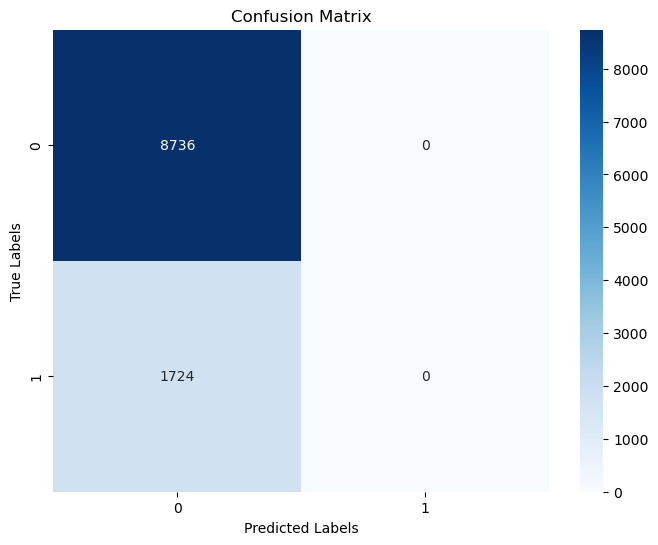

In [15]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred)  

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels');

Logistic Regression does not seem to be able to predict diabetes using ACE scores. 

### SMOTE

In [66]:
# Data Preprocessing
X = ace.drop(['DIABETE4', 'BPHIGH6'], axis=1)  # Input features
y_diabetes = ace['DIABETE4']  # Target variable for diabetes prediction

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_diabetes, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Model Selection (Logistic Regression)
model = LogisticRegression()

# Model Training
model.fit(X_train_balanced, y_train_balanced)

# Model Evaluation
y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

Accuracy: 0.4237093690248566
Precision: 0.1789018203521337
Recall: 0.6954756380510441
F1-Score: 0.2845953002610966


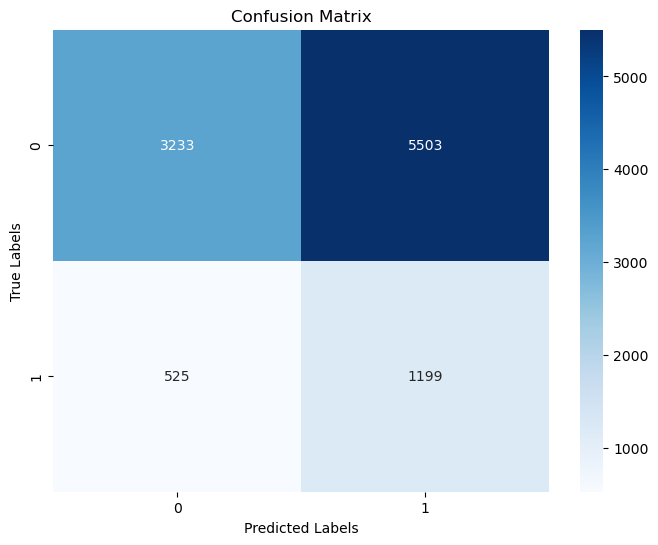

In [67]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred)  

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels');

In [77]:
# Obtain predicted probabilities for the positive class
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Adjust the decision threshold
threshold = 0.44  
y_pred_adjusted = (y_pred_proba > threshold).astype(int)

# Calculate recall
recall = metrics.recall_score(y_test, y_pred_adjusted)

print(f'Recall: {recall}')

Recall: 0.919953596287703


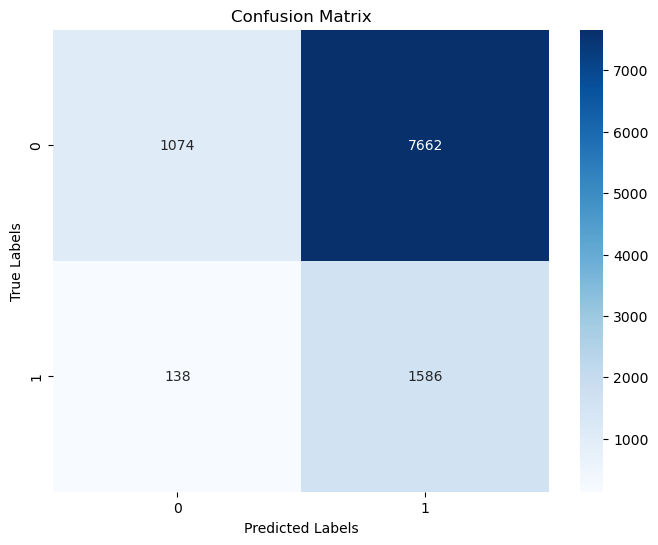

In [78]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_adjusted)  

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels');

### High Blood Pressure

In [80]:
# Step 1: Data Preprocessing
X = ace.drop(['DIABETE4', 'BPHIGH6'], axis=1)  # Input features
y_high_blood_pressure = ace['BPHIGH6']  # Target variable for high blood pressure prediction

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_high_blood_pressure, test_size=0.2, random_state=42)

# Step 3: Model Selection (Logistic Regression)
model = LogisticRegression()

# Step 4: Model Training
model.fit(X_train, y_train)

# Step 5: Model Evaluation
y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}') 

Accuracy: 0.5668260038240918
Precision: 0.5662734212352533
Recall: 0.17280813214739518
F1-Score: 0.2648061009248742


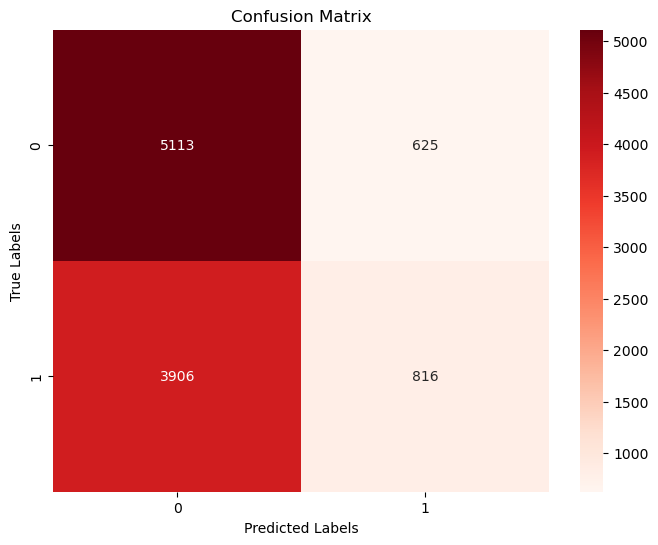

In [81]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels');

The initial logistic regression to predict high blood pressure is working better than the logistic regression for diabetes, but still needs to predict more cases correctly. 

#### Hyperparameters

##### Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'max_iter': [100, 200, 300],
    'class_weight': [None, 'balanced'],
}

##### Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

##### Print the best hyperparameters
best_params = grid_search.best_params_
print('Best Hyperparameters:')
print(best_params)

##### Get the best model with the best hyperparameters
best_model = grid_search.best_estimator_

##### Model Evaluation
y_pred = best_model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

print('Evaluation Metrics:')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

Best Hyperparameters:

{'C': 0.1, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}

Evaluation Metrics:

Accuracy: 0.5652007648183557

Precision: 0.561877667140825

Recall: 0.16730199068191445

F1-Score: 0.2578328981723238

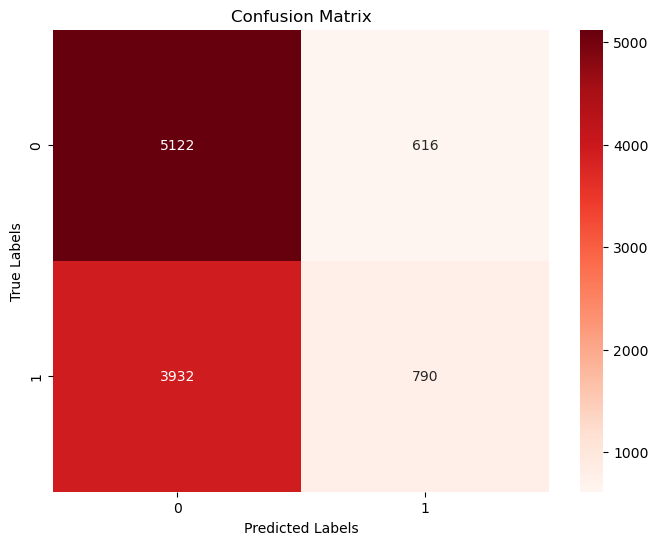

In [30]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels');

In [28]:
##### Define the parameter grid
param_grid = {
    'C': [0.01, 0.5, 0.8, 0.9, 0.1, 0.11], 
    'penalty': ['l2'],
    'solver': ['liblinear'],
    'max_iter': [15, 25, 50, 75, 100, 200],
    'class_weight': [None],
}

##### Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

##### Print the best hyperparameters
best_params = grid_search.best_params_
print('Best Hyperparameters:')
print(best_params)

##### Get the best model with the best hyperparameters
best_model = grid_search.best_estimator_

##### Model Evaluation
y_pred = best_model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

print('Evaluation Metrics:')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

Best Hyperparameters:
{'C': 0.11, 'class_weight': None, 'max_iter': 15, 'penalty': 'l2', 'solver': 'liblinear'}
Evaluation Metrics:
Accuracy: 0.5652007648183557
Precision: 0.561877667140825
Recall: 0.16730199068191445
F1-Score: 0.2578328981723238


Best Hyperparameters:

{'C': 0.11, 'class_weight': None, 'max_iter': 15, 'penalty': 'l2', 'solver': 'liblinear'}

Evaluation Metrics:

Accuracy: 0.5652007648183557

Precision: 0.561877667140825

Recall: 0.16730199068191445

F1-Score: 0.2578328981723238

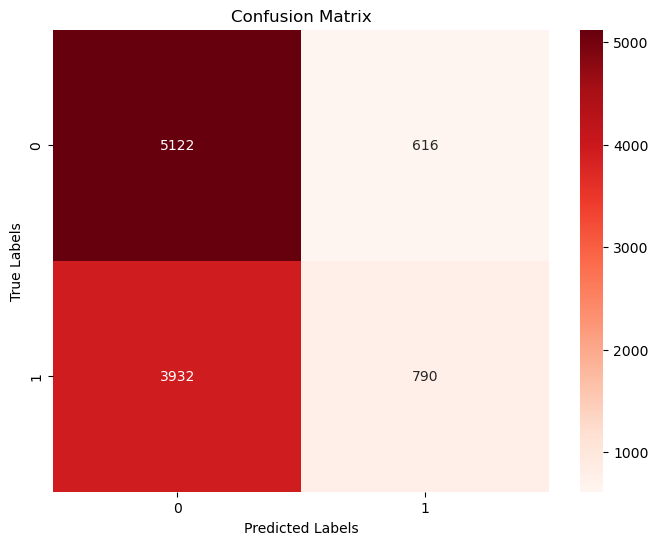

In [29]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels');

Hyperparameters do not seem to work well for the logistic regression models on both the diabetes and high blood pressure predictions. 

### SMOTE

In [82]:
# Data Preprocessing
X = ace.drop(['DIABETE4', 'BPHIGH6'], axis=1)  # Input features
y_high_bp = ace['BPHIGH6']  # Target variable for high blood pressure prediction

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_high_bp, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Model Selection (Logistic Regression)
model = LogisticRegression()

# Model Training
model.fit(X_train_balanced, y_train_balanced)

# Model Evaluation
y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

Accuracy: 0.5482791586998088
Precision: 0.49976374232162546
Recall: 0.6719610334603981
F1-Score: 0.5732092855207298


In [99]:
# Obtain predicted probabilities for the positive class
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Adjust the decision threshold
threshold = 0.4
y_pred_adjusted = (y_pred_proba > threshold).astype(int)

# Calculate recall
recall = metrics.recall_score(y_test, y_pred_adjusted)

print(f'Recall: {recall}')

Recall: 0.927996611605252


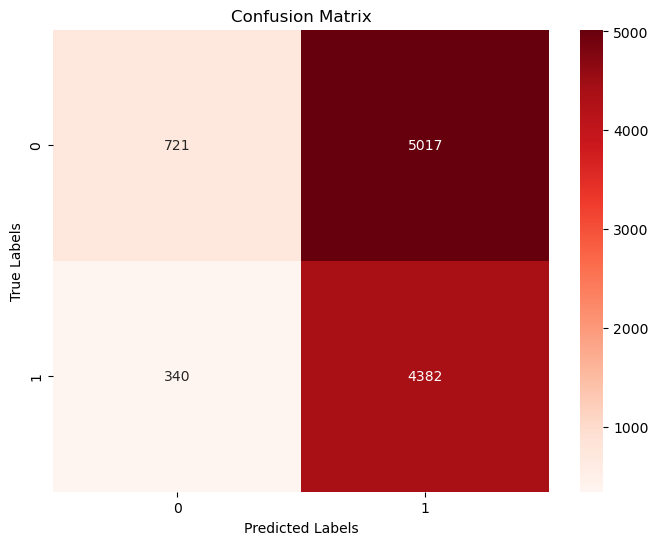

In [100]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred_adjusted)  

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels');

For both the diabetes and high blood pressure logistic regression models, SMOTE is able to help better achieve true results, but does so by overpredicting many false positives. 

## Gradient Boosting

### Diabetes 

In [50]:
# Data Preprocessing
X = ace.drop(['DIABETE4', 'BPHIGH6'], axis=1)  # Input features
y_diabetes = ace['DIABETE4']  # Target variable for diabetes prediction

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_diabetes, test_size=0.2, random_state=42)

# Model Training
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

print('Evaluation Metrics:')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

Evaluation Metrics:
Accuracy: 0.8351816443594646
Precision: 0.0
Recall: 0.0
F1-Score: 0.0


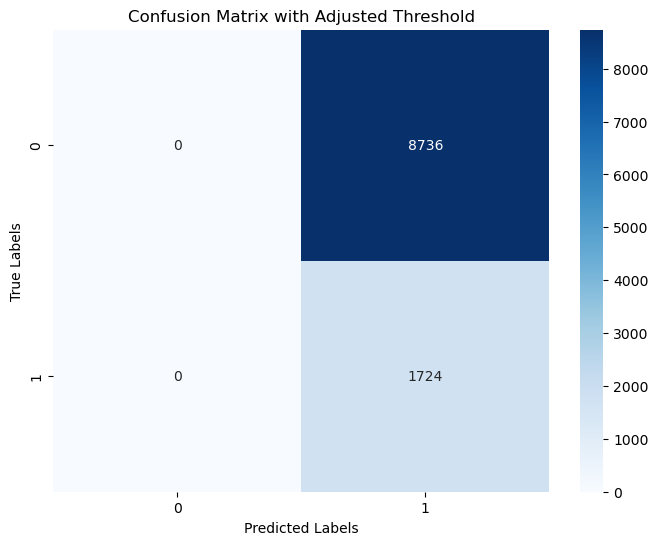

In [51]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred_threshold)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels');

In [52]:
# Model Evaluation with Adjusted Threshold
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class
threshold = 0.0001  # Adjust the threshold for sensitivity 

y_pred_threshold = (y_pred_proba >= threshold).astype(int)  # Adjusted predictions based on the threshold
accuracy = metrics.accuracy_score(y_test, y_pred_threshold)
precision = metrics.precision_score(y_test, y_pred_threshold)
recall = metrics.recall_score(y_test, y_pred_threshold)
f1 = metrics.f1_score(y_test, y_pred_threshold)

print('Evaluation Metrics with Adjusted Threshold:')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

Evaluation Metrics with Adjusted Threshold:
Accuracy: 0.16481835564053537
Precision: 0.16481835564053537
Recall: 1.0
F1-Score: 0.2829940906106369


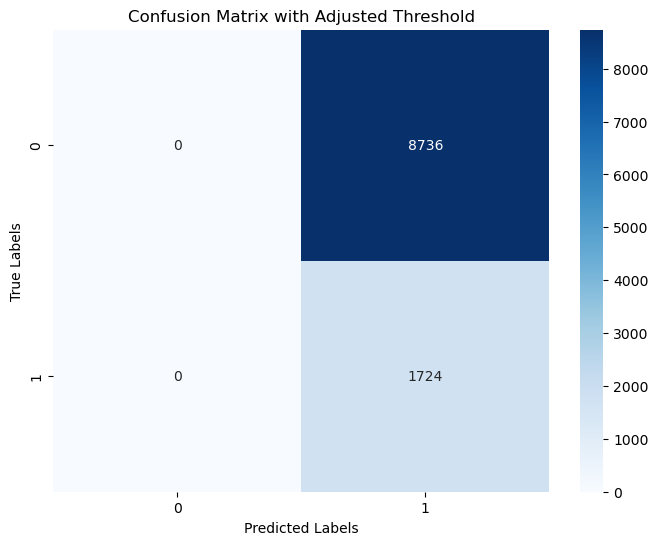

In [53]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred_threshold)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels');

### SMOTE 

Evaluation Metrics:
Accuracy: 0.47294455066921604
Precision: 0.17676164477051698
Recall: 0.6009280742459396
F1-Score: 0.27317073170731704


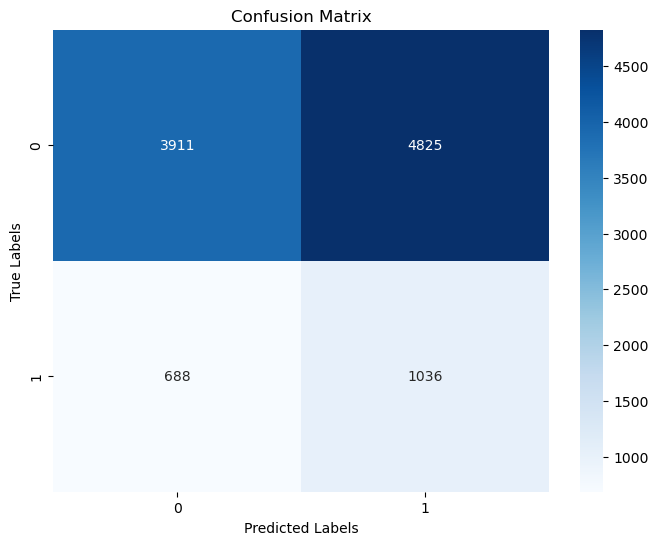

In [101]:
# Data Preprocessing
X = ace.drop(['DIABETE4', 'BPHIGH6'], axis=1)  # Input features
y_diabetes = ace['DIABETE4']  # Target variable for diabetes prediction

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_diabetes, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Model Training
model = GradientBoostingClassifier()
model.fit(X_train_balanced, y_train_balanced)

# Model Evaluation
y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

print('Evaluation Metrics:')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels');

In [102]:
# Model Evaluation with Adjusted Threshold
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class
threshold = 0.3  # Adjust the threshold for sensitivity 

y_pred_threshold = (y_pred_proba >= threshold).astype(int)  # Adjusted predictions based on the threshold
accuracy = metrics.accuracy_score(y_test, y_pred_threshold)
precision = metrics.precision_score(y_test, y_pred_threshold)
recall = metrics.recall_score(y_test, y_pred_threshold)
f1 = metrics.f1_score(y_test, y_pred_threshold)

print('Evaluation Metrics with Adjusted Threshold:')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

Evaluation Metrics with Adjusted Threshold:
Accuracy: 0.21003824091778203
Precision: 0.16857577293461734
Recall: 0.9646171693735499
F1-Score: 0.28699628958495127


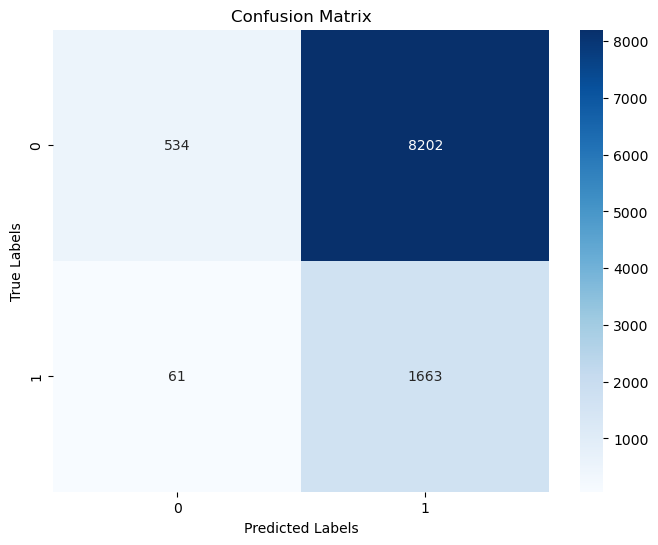

In [104]:
# Confusion Matrix
y_pred_threshold = (y_pred_proba >= threshold).astype(int)

cm = confusion_matrix(y_test, y_pred_threshold)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels');

### High Blood Pressure 

In [55]:
# Data Preprocessing
X = ace.drop(['DIABETE4', 'BPHIGH6'], axis=1)  # Input features
y_diabetes = ace['BPHIGH6']  # Target variable for high blood pressure prediction 

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_diabetes, test_size=0.2, random_state=42)

# Model Training
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

print('Evaluation Metrics:')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}') 

Evaluation Metrics:
Accuracy: 0.5653919694072658
Precision: 0.5597014925373134
Recall: 0.17471410419313851
F1-Score: 0.2663008392511298


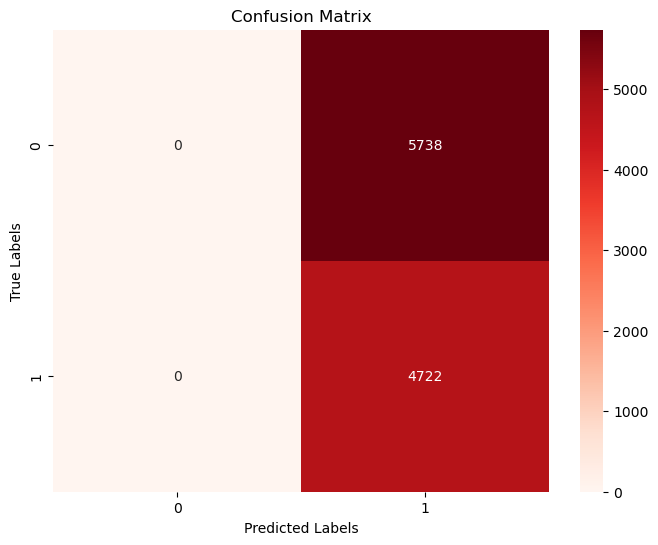

In [56]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred_threshold)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels');

In [59]:
# Model Evaluation with Adjusted Threshold
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class
threshold = 0.0000000001  # Adjust the threshold for sensitivity 

y_pred_threshold = (y_pred_proba >= threshold).astype(int)  # Adjusted predictions based on the threshold
accuracy = metrics.accuracy_score(y_test, y_pred_threshold)
precision = metrics.precision_score(y_test, y_pred_threshold)
recall = metrics.recall_score(y_test, y_pred_threshold)
f1 = metrics.f1_score(y_test, y_pred_threshold)

print('Evaluation Metrics with Adjusted Threshold:')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

Evaluation Metrics with Adjusted Threshold:
Accuracy: 0.451434034416826
Precision: 0.451434034416826
Recall: 1.0
F1-Score: 0.6220524305098143


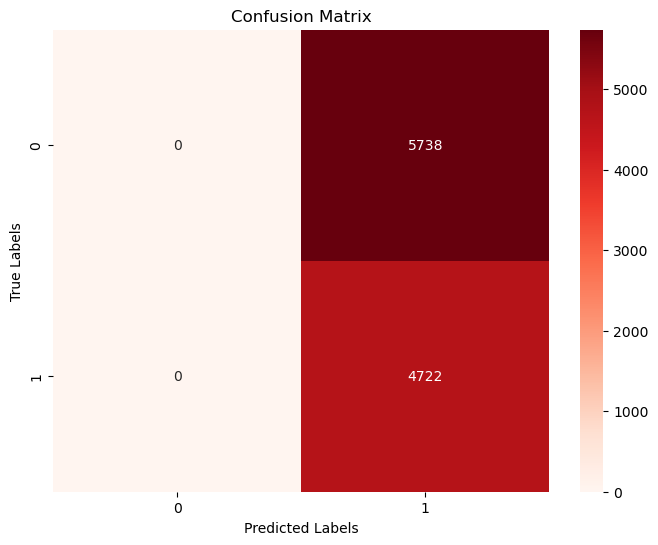

In [60]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred_threshold)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels'); 

Though gradient boosting is able to predict all of the diabetes and high blood pressure values, it does so by predicting ALL values as 'true'. Despite adjusting the threshold, gradient boosting does not budge. 

### SMOTE

Evaluation Metrics:
Accuracy: 0.5492351816443595
Precision: 0.5005466187724504
Recall: 0.6787378229563744
F1-Score: 0.5761797752808989


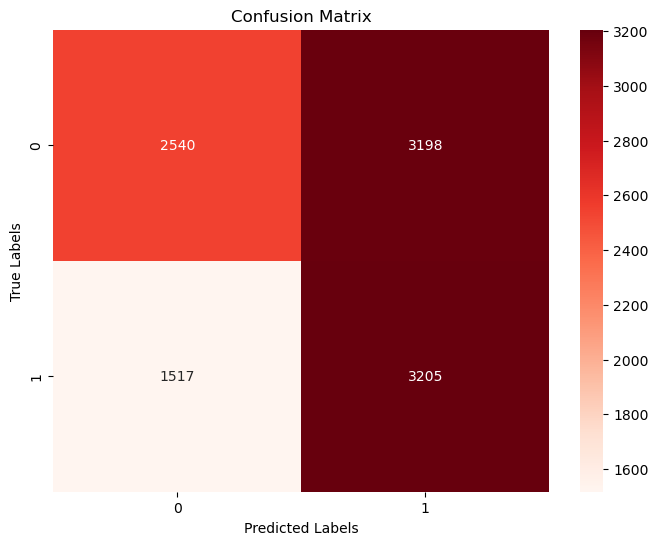

In [108]:
# Data Preprocessing
X = ace.drop(['DIABETE4', 'BPHIGH6'], axis=1)  # Input features
y_bp = ace['BPHIGH6']  # Target variable for high blood pressure prediction

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_bp, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Model Training
model = GradientBoostingClassifier()
model.fit(X_train_balanced, y_train_balanced)

# Model Evaluation
y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

print('Evaluation Metrics:')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels');

Evaluation Metrics with Adjusted Threshold:
Accuracy: 0.45936902485659653
Precision: 0.4547219256527225
Recall: 0.9921643371452774
F1-Score: 0.6236272878535774


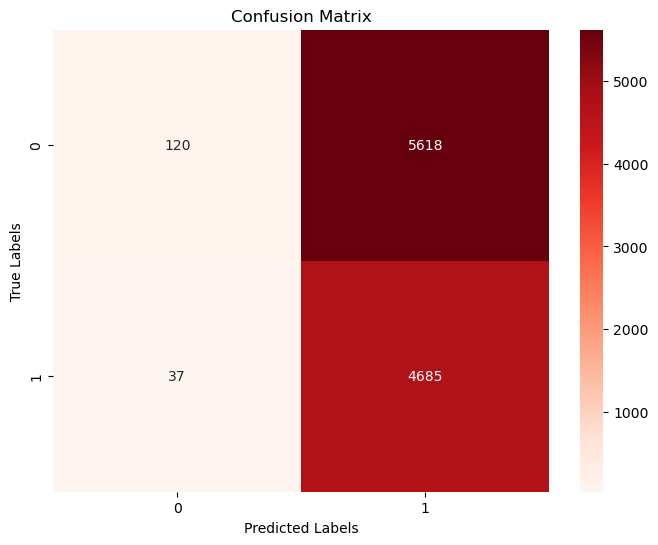

In [109]:
# Model Evaluation with Adjusted Threshold
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class
threshold = 0.3  # Adjust the threshold for sensitivity 

y_pred_threshold = (y_pred_proba >= threshold).astype(int)  # Adjusted predictions based on the threshold
accuracy = metrics.accuracy_score(y_test, y_pred_threshold)
precision = metrics.precision_score(y_test, y_pred_threshold)
recall = metrics.recall_score(y_test, y_pred_threshold)
f1 = metrics.f1_score(y_test, y_pred_threshold)

print('Evaluation Metrics with Adjusted Threshold:')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

# Confusion Matrix
y_pred_threshold = (y_pred_proba >= threshold).astype(int)

cm = confusion_matrix(y_test, y_pred_threshold)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels');

For both the diabetes and high blood pressure logistic regression models, SMOTE is able to help better achieve true results, but does so by overpredicting many false positives. 

Overall, gradient boosting works to predict positive values by ONLY predicting those values. Without SMOTE, adjusting the threshold to balance sensitivity did not help. Using SMOTE helped balance the classes, but the overall outcomes were similar in accuracy, precision, and f1-scores. Despite SMOTE helping to balance the classes, the outcome was still overpredicting positive values leading to a large amount of false positives, to the point where the model would not be useful. 

## Neural Network 

### Diabetes 

In [111]:
# Data Preprocessing
X = ace.drop(['DIABETE4', 'BPHIGH6'], axis=1).values  # Input features
y = ace['DIABETE4'].values  # Target variable for diabetes prediction

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the MLP model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

Epoch 1/10
1308/1308 [==============================] - 4s 2ms/step - loss: 0.4510 - accuracy: 0.8338
Epoch 2/10
1308/1308 [==============================] - 3s 2ms/step - loss: 0.4475 - accuracy: 0.8339
Epoch 3/10
1308/1308 [==============================] - 3s 2ms/step - loss: 0.4471 - accuracy: 0.8339
Epoch 4/10
1308/1308 [==============================] - 3s 2ms/step - loss: 0.4467 - accuracy: 0.8339
Epoch 5/10
1308/1308 [==============================] - 3s 2ms/step - loss: 0.4463 - accuracy: 0.8339
Epoch 6/10
1308/1308 [==============================] - 3s 3ms/step - loss: 0.4460 - accuracy: 0.8339
Epoch 7/10
1308/1308 [==============================] - 3s 2ms/step - loss: 0.4460 - accuracy: 0.8339
Epoch 8/10
1308/1308 [==============================] - 4s 3ms/step - loss: 0.4456 - accuracy: 0.8340
Epoch 9/10
1308/1308 [==============================] - 3s 2ms/step - loss: 0.4451 - accuracy: 0.8340
Epoch 10/10
327/327 [==============================] - 1s 2ms/step - loss: 0.4458 

327/327 [==============================] - 1s 2ms/step


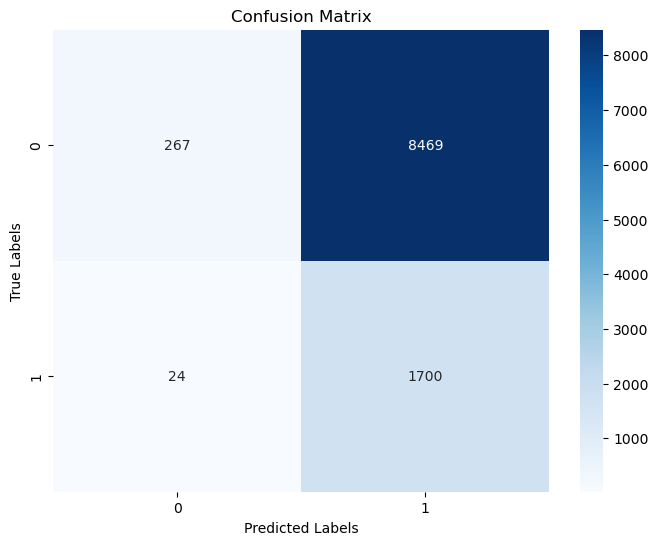

In [117]:
# Predict the probabilities for the test set
y_pred_proba = model.predict(X_test)

# Apply a threshold to obtain the predicted classes
threshold = 0.1
y_pred_threshold = (y_pred_proba >= threshold).astype(int)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_threshold)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels'); 

### SMOTE

Epoch 1/10
2181/2181 [==============================] - 6s 2ms/step - loss: 0.6873 - accuracy: 0.5322
Epoch 2/10
2181/2181 [==============================] - 5s 2ms/step - loss: 0.6831 - accuracy: 0.5407
Epoch 3/10
2181/2181 [==============================] - 5s 2ms/step - loss: 0.6810 - accuracy: 0.5439
Epoch 4/10
2181/2181 [==============================] - 5s 2ms/step - loss: 0.6787 - accuracy: 0.5484
Epoch 5/10
2181/2181 [==============================] - 6s 3ms/step - loss: 0.6765 - accuracy: 0.5511
Epoch 6/10
2181/2181 [==============================] - 5s 2ms/step - loss: 0.6743 - accuracy: 0.5526
Epoch 7/10
2181/2181 [==============================] - 6s 3ms/step - loss: 0.6720 - accuracy: 0.5546
Epoch 8/10
2181/2181 [==============================] - 5s 2ms/step - loss: 0.6694 - accuracy: 0.5571
Epoch 9/10
2181/2181 [==============================] - 5s 2ms/step - loss: 0.6677 - accuracy: 0.5577
Epoch 10/10
327/327 [==============================] - 1s 2ms/step - loss: 0.6862 

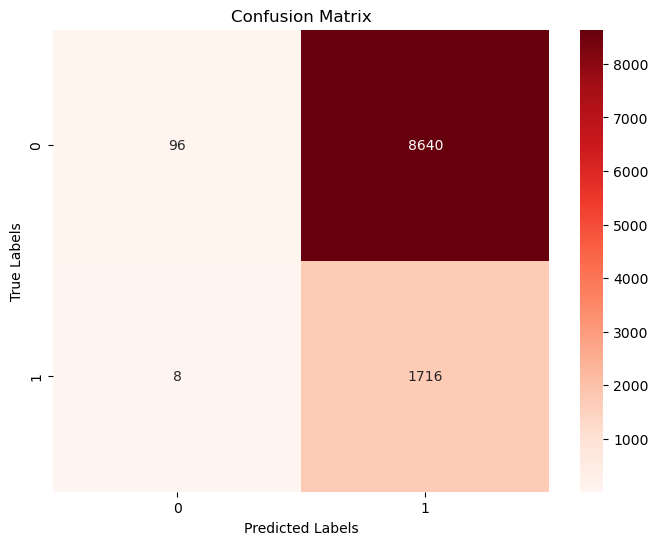

In [119]:
# Data Preprocessing
X = ace.drop(['DIABETE4', 'BPHIGH6'], axis=1).values  # Input features
y = ace['DIABETE4'].values  # Target variable for diabetes prediction

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Standardize the input features
scaler = StandardScaler()
X_train_balanced = scaler.fit_transform(X_train_balanced)
X_test = scaler.transform(X_test)

# Define the MLP model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_balanced.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_balanced, y_train_balanced, epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

# Create the confusion matrix
y_pred_proba = model.predict(X_test)
threshold = 0.1
y_pred_threshold = (y_pred_proba >= threshold).astype(int)

cm = confusion_matrix(y_test, y_pred_threshold)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels');

### High Blood Pressure 

In [120]:
# Data Preprocessing
X = ace.drop(['DIABETE4', 'BPHIGH6'], axis=1).values  # Input features
y = ace['BPHIGH6'].values  # Target variable for high blood pressure prediction

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the MLP model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

Epoch 1/10
1308/1308 [==============================] - 4s 2ms/step - loss: 0.6832 - accuracy: 0.5511
Epoch 2/10
1308/1308 [==============================] - 3s 3ms/step - loss: 0.6805 - accuracy: 0.5599
Epoch 3/10
1308/1308 [==============================] - 3s 2ms/step - loss: 0.6798 - accuracy: 0.5595
Epoch 4/10
1308/1308 [==============================] - 3s 3ms/step - loss: 0.6794 - accuracy: 0.5616
Epoch 5/10
1308/1308 [==============================] - 3s 2ms/step - loss: 0.6792 - accuracy: 0.5612
Epoch 6/10
1308/1308 [==============================] - 3s 3ms/step - loss: 0.6788 - accuracy: 0.5623
Epoch 7/10
1308/1308 [==============================] - 3s 3ms/step - loss: 0.6786 - accuracy: 0.5618
Epoch 8/10
1308/1308 [==============================] - 3s 2ms/step - loss: 0.6782 - accuracy: 0.5632
Epoch 9/10
1308/1308 [==============================] - 3s 3ms/step - loss: 0.6775 - accuracy: 0.5639
Epoch 10/10
327/327 [==============================] - 1s 2ms/step - loss: 0.6798 

327/327 [==============================] - 1s 2ms/step


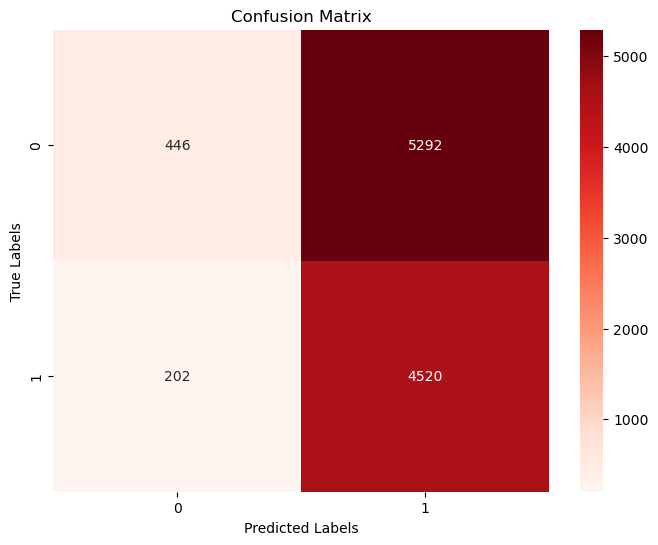

In [122]:
# Predict the probabilities for the test set
y_pred_proba = model.predict(X_test)

# Apply a threshold to obtain the predicted classes
threshold = 0.3
y_pred_threshold = (y_pred_proba >= threshold).astype(int)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_threshold)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels'); 

### SMOTE 

Epoch 1/10
1441/1441 [==============================] - 5s 3ms/step - loss: 0.6883 - accuracy: 0.5445
Epoch 2/10
1441/1441 [==============================] - 4s 2ms/step - loss: 0.6855 - accuracy: 0.5480
Epoch 3/10
1441/1441 [==============================] - 4s 3ms/step - loss: 0.6847 - accuracy: 0.5517
Epoch 4/10
1441/1441 [==============================] - 4s 2ms/step - loss: 0.6841 - accuracy: 0.5526
Epoch 5/10
1441/1441 [==============================] - 4s 3ms/step - loss: 0.6837 - accuracy: 0.5515
Epoch 6/10
1441/1441 [==============================] - 3s 2ms/step - loss: 0.6831 - accuracy: 0.5536
Epoch 7/10
1441/1441 [==============================] - 4s 3ms/step - loss: 0.6827 - accuracy: 0.5542
Epoch 8/10
1441/1441 [==============================] - 4s 3ms/step - loss: 0.6824 - accuracy: 0.5548
Epoch 9/10
1441/1441 [==============================] - 3s 2ms/step - loss: 0.6818 - accuracy: 0.5556
Epoch 10/10
327/327 [==============================] - 1s 3ms/step - loss: 0.6837 

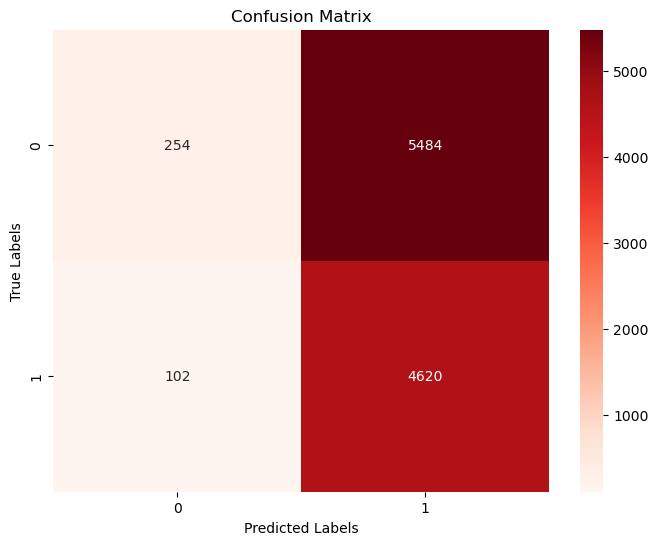

In [124]:
# Data Preprocessing
X = ace.drop(['DIABETE4', 'BPHIGH6'], axis=1).values  # Input features
y = ace['BPHIGH6'].values  # Target variable for diabetes prediction

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Standardize the input features
scaler = StandardScaler()
X_train_balanced = scaler.fit_transform(X_train_balanced)
X_test = scaler.transform(X_test)

# Define the MLP model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_balanced.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_balanced, y_train_balanced, epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

# Create the confusion matrix
y_pred_proba = model.predict(X_test)
threshold = 0.3
y_pred_threshold = (y_pred_proba >= threshold).astype(int)

cm = confusion_matrix(y_test, y_pred_threshold)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels');

The neural networks work similarly to the previous models in that they are only able to predict true positives when they overpredict false positives at a high rate. The neural network seems to be able to work similarly with and without thresholds/SMOTE, though, unlike the logistic regression and gradient boosting models. 

# Evaluation

#### Problem Statement:
Can a machine learning model use childhood trauma assessments to predict diabetes and high blood pressure in adults, and can this tool be used for preventative care? The model will be evaluated based on accuracy and F1-score, but more importantly will need high sensitivity to prevent false negatives that could hinder treatment for patients that need more care. The goal is for the sensitivity to be above 90% in order for it to be considered useful for preventative care.

All three models were able to technically achieve over 90% for sensitivity, but the result of this is not a useful model. The models are only able to predict true positives by increasing the number of false positives. Ultimately, these models would not be useful for preventative care, as they essentially deem people to be at risk at random. Healthcare providers would not find these models to be useful in order to use ACE scores to know the likelihood of a patient developing a chronic condition. 

Some downfalls of these models are:

- **Data:** A limitation of the current models is the reliance on 2021 data only. Collecting data from multiple years or including a more diverse and representative sample can improve the models' performance and generalizability.

- **Refinement of Target Variable:** Their is no distinguishing between type 1 and type 2 diabetes in the BRFSS data. By incorporating additional information about the onset and nature of diabetes, the models can provide more accurate predictions and recommendations for preventative care.

- “ *With the exception of verbally abusive respondents, eligible persons who initially refuse to be interviewed will be contacted at least one additional time and given the opportunity to be interviewed. Preferably, this second contact will be made by a supervisor or a different interviewer.* ” This protocol for the collection of data for the BRFSS questionnaire could effect the outcome by:

1. **Selection Bias**: If some individuals refuse to participate initially but are contacted again and eventually agree to be interviewed, there is a potential for selection bias. This means that the characteristics of the individuals who initially refused to participate and were contacted again may differ from those who agreed to participate right away. This can introduce bias into the dataset and affect the representativeness of the sample. Also, by (understandably) excluding verbally abusive respondents, they are excluding respondents that may have a higher chance of having high ACE scores. 

2. **Response Bias**: The process of contacting individuals who initially refused to be interviewed and giving them a second opportunity may influence their responses. People who agree to participate after being contacted again may have different attitudes, experiences, or motivations compared to those who declined to participate in the first instance. This can introduce response bias and impact the accuracy and validity of the collected data.

3. **Non-response Bias**: Non-response bias refers to the potential differences between the characteristics of respondents and non-respondents. In this case, individuals who initially refuse to be interviewed but are contacted again may have different characteristics than those who refuse to participate altogether. This can lead to biased estimates and affect the generalizability of the findings to the target population.

4. **Interviewer Bias**: The involvement of a supervisor or a different interviewer during the second contact may introduce interviewer bias. Different interviewers may have varying interviewing styles, levels of rapport-building, or approaches to data collection, which can influence respondents' answers. This can introduce systematic errors in the data and impact its reliability.

In the future, with more time and resources, it is still possible for a machine learning model to be made to use ACE scores to help healthcare providers know more about their patients for preventative care. Though these models did not achieve a useful status, they are a step in the right direction for a future tool. 

Healthcare providers should still be cognizant of their patient's history and how it could be effecting them. Healthcare providers should continue preventative practices for all patients as normal. 